# Train LSTM model using Keras

In [1]:
import pandas as pd 
import numpy as np 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# parameter
max_features = 5000 # the number of words to encode
maxlen = 100 # maximum size of each list

# Data Processing
## Loadfile
- Load csv file generated from data_clean.ipynb
- Combine positive and negative reviews together and assign labels
- convert sentiment to numeric: index 1 is positive and 0 is negative

In [3]:
train_neg = pd.read_csv('data/train_neg.csv', index_col=None, encoding='utf-8')
train_pos = pd.read_csv('data/train_pos.csv', index_col=None, encoding='utf-8')
train = np.concatenate([train_neg, train_pos], axis=0)
train = pd.DataFrame(data=train, columns=["review", "sentiment"])
train

,review,sentiment
0,Working with one of the best Shakespeare sourc...,neg
1,"Well...tremors I, the original started off in ...",neg
2,Ouch! This one was a bit painful to sit throug...,neg
3,"I've seen some crappy movies in my life, but t...",neg
4,"""Carriers"" follows the exploits of two guys an...",neg
...,...,...
24995,About a year ago I finally gave up on American...,pos
24996,When I saw the elaborate DVD box for this and ...,pos
24997,"Last November, I had a chance to see this film...",pos
24998,Great movie -I loved it. Great editing and use...,pos


In [4]:
test_neg = pd.read_csv('data/test_neg.csv', index_col=None, encoding='utf-8')
test_pos = pd.read_csv('data/test_pos.csv', index_col=None, encoding='utf-8')
test = np.concatenate([test_neg, test_pos], axis=0)
test = pd.DataFrame(data=test, columns=["review", "sentiment"])
test

,review,sentiment
0,Alan Rickman & Emma Thompson give good perform...,neg
1,I have seen this movie and I did not care for ...,neg
2,"In Los Angeles, the alcoholic and lazy Hank Ch...",neg
3,"This film is bundled along with ""Gli fumavano ...",neg
4,I only comment on really very good films and o...,neg
...,...,...
24995,"This movie is certainly well-constructed, begi...",pos
24996,Nice to see a comedy for grown ups. Masterfull...,pos
24997,Jean Renoir's homage to the Paris of the late ...,pos
24998,What are the movies? I mean.. what are movies ...,pos


In [5]:
# convert sentiment to numeric
train['sentiment'] = train['sentiment'].map({'pos': 1, 'neg': 0})
test['sentiment'] = test['sentiment'].map({'pos': 1, 'neg': 0})
y_train = train['sentiment']
y_test = test['sentiment']

## Preparing text for NLP
- Extract the actual texts from training set
- Tokenizer: create a word-to-index dictionary: each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.
- fit_on_texts: create associations of words and numbers as shown in the image below.
- texts_to_sequences: transforms each text in texts to a sequence of integers.

In [6]:
# get the actual texts from training set
X_train = train.review.values.astype(str)
X_test = test.review.values.astype(str)
# initialize the tokenizer with a 5000 word limit
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
# list of texts to turn to sequences.
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

- find the vocabulary size
- pad_sequences: make all sequences in a given standard length
    - for list with size greater than 100, it will be truncated to 100. 
    - for list with size less than 100, it will add 0 at the end of the list until it reaches the max length 100.

In [7]:
# adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
# padding
X_train_padded_sequence = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_padded_sequence = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Model

In [8]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               1600250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 1,920,501
Trainable params: 1,920,501
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X_train_padded_sequence, y_train, validation_data=(X_test_padded_sequence, y_test), 
          epochs = 10, batch_size=256, verbose=1)

/usr/local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 128us/step - loss: 0.4992 - accuracy: 0.7369 - val_loss: 0.3460 - val_accuracy: 0.8478
Epoch 2/10
25000/25000 [==============================] - 3s 123us/step - loss: 0.2001 - accuracy: 0.9262 - val_loss: 0.3849 - val_accuracy: 0.8348
Epoch 3/10
25000/25000 [==============================] - 3s 111us/step - loss: 0.0455 - accuracy: 0.9897 - val_loss: 0.5030 - val_accuracy: 0.8329
Epoch 4/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 0.5757 - val_accuracy: 0.8341
Epoch 5/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.6112 - val_accuracy: 0.8359
Epoch 6/10
25000/25000 [==============================] - 3s 108us/step - loss: 9.4294e-04 - accuracy: 1.0000 - val_loss: 0.6389 - val_accuracy: 0.8370
Epoch 7/10
25000/25000 [==============================] - 

In [10]:
# final evaluation of the model
scores = model.evaluate(X_test_padded_sequence, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

25000/25000 [==============================] - 1s 30us/step
Accuracy: 83.80%


In [11]:
print("Test Score:", scores[0])
print("Test Accuracy:", scores[1])

Test Score: 0.7107804370975495
Test Accuracy: 0.8379999995231628


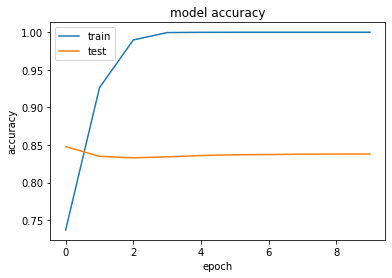

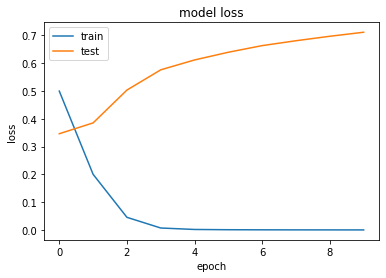

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()